<a href="https://colab.research.google.com/github/BitCub/PythonAnalysis/blob/main/Analysing_HastroBros_Weekly_NBA_Regular_Season_Predictions_23_24_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Anaysing Hastrobros Weekly NBA Predictions for the NBA 2023-24 Season



#### Importing the Dataset from Google Sheets

Importing the data set.

In [ ]:
import numpy as np
import gspread
import pandas as pd
import matplotlib.pyplot as plt
from google.auth import default
from google.colab import auth
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
spreadsheet = gc.open_by_key('11cnBmTV2G0AIyRs7F6mdYIlKA-aktc_3n4CQ2nkAmP8')
worksheet = spreadsheet.get_worksheet(0)
df = pd.DataFrame(worksheet.get("A1:K65"))

# Code for making the first row as header
df.columns = df.iloc[0]
df = df.drop(0)
df.head()

,NBA Week,Match Date,Home Team,Away Team,Ryvon's Prediction,Hansel's Prediction,Hakeem's Predictions,Matchup Winner,Ryvon's Points,Hansel's Points,Hakeem's Points
1,Week 1,24-Oct-23,Nuggets,Lakers,Lakers,Nuggets,Lakers,Nuggets,0,1,0
2,Week 1,24-Oct-23,Warriors,Suns,Warriors,Suns,Suns,Suns,0,1,1
3,Week 2,31-Oct-23,Cavaliers,Knicks,Cavaliers,Knicks,Cavs,Knicks,0,1,0
4,Week 2,1-Nov-23,Timberwolves,Nuggets,Timberwolves,Nuggets,Nuggets,Timberwolves,1,0,0
5,Week 2,3-Nov-23,Thunder,Warriors,Thunder,Warriors,Warriors,Warriors,0,1,1


In [ ]:
df.dtypes

0
NBA Week                object
Match Date              object
Home Team               object
Away Team               object
Ryvon's Prediction      object
Hansel's Prediction     object
Hakeem's Predictions    object
Matchup Winner          object
Ryvon's Points          object
Hansel's Points         object
Hakeem's Points         object
dtype: object

In [ ]:
# Change all the data to the appropriate datatypes

df["Match Date"] = pd.to_datetime(df["Match Date"])
df[["Ryvon's Points", "Hansel's Points", "Hakeem's Points"]] = df[["Ryvon's Points", "Hansel's Points", "Hakeem's Points"]].astype("int")
df[["Home Team", "Away Team","Ryvon's Prediction", "Hansel's Prediction", "Hakeem's Predictions", "Matchup Winner"]] = df[["Home Team", "Away Team","Ryvon's Prediction", "Hansel's Prediction", "Hakeem's Predictions", "Matchup Winner"]].astype("string")

<ipython-input-4-142bea9d1a1b>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Match Date"] = pd.to_datetime(df["Match Date"])


In [ ]:
df.dtypes

0
NBA Week                        object
Match Date              datetime64[ns]
Home Team               string[python]
Away Team               string[python]
Ryvon's Prediction      string[python]
Hansel's Prediction     string[python]
Hakeem's Predictions    string[python]
Matchup Winner          string[python]
Ryvon's Points                   int64
Hansel's Points                  int64
Hakeem's Points                  int64
dtype: object

In [ ]:
df.head()

,NBA Week,Match Date,Home Team,Away Team,Ryvon's Prediction,Hansel's Prediction,Hakeem's Predictions,Matchup Winner,Ryvon's Points,Hansel's Points,Hakeem's Points
1,Week 1,2023-10-24,Nuggets,Lakers,Lakers,Nuggets,Lakers,Nuggets,0,1,0
2,Week 1,2023-10-24,Warriors,Suns,Warriors,Suns,Suns,Suns,0,1,1
3,Week 2,2023-10-31,Cavaliers,Knicks,Cavaliers,Knicks,Cavs,Knicks,0,1,0
4,Week 2,2023-11-01,Timberwolves,Nuggets,Timberwolves,Nuggets,Nuggets,Timberwolves,1,0,0
5,Week 2,2023-11-03,Thunder,Warriors,Thunder,Warriors,Warriors,Warriors,0,1,1


In [ ]:
# Determine the number of prediction matchups this season (identified by the number of rows in the Data Frame)
total_matchups = df.shape[0]
print(total_matchups)

64


In [ ]:
#Determing Number of Weeks of Predictions

len(df["NBA Week"].unique())

21

#### Team in Most Matchups

In [ ]:
# Determine the team in the most frequent team in matchups

#Combine Home Team data and Away Team data into a single row Series and find the mode value

# Create new Series with home teams and concat away_ teams column onto the series

df_ha = pd.concat([df['Home Team'],df['Away Team']])
print("The team that was most frequenlty in our Marquee Matchups is:",df_ha.mode()[0], "and",df_ha.mode()[1] )

The team that was most frequenlty in our Marquee Matchups is: Nuggets and Timberwolves


In [ ]:
# Top 5 most Frequent Teams

df_ha.value_counts().head(5)

Nuggets         12
Timberwolves    12
Clippers        10
Celtics         10
Lakers           9
Name: count, dtype: Int64

In [ ]:
# Use this combination to find the number of different teams who made it to the Mrquee Matchups

len(df_ha.unique())

21

#### Team with Highest Win and Lowest % and Most Wins

In [ ]:
# Determine the Team with Highest Win % in Hastrobros Marquee Matchups

# Get the total number of Matchups each team had and put it in a df

matchup_count = df_ha.value_counts()

df_2 = pd.Series.to_frame(matchup_count)

# Index was the name of the teams reset the index so teams can be values in the df
df_2.reset_index(inplace=True)

df_2.rename(columns= {'index': 'Teams','count': 'Total_Matchups'}, inplace=True)

In [ ]:

# Add the number of times the team won use the Matchup Winner column in original df to df_2

df_matchup_winners = df['Matchup Winner'].value_counts().reset_index()

In [ ]:
# Merge the dataframes to add the number of times the team won to df_2

df_2_new = df_2.merge(df_matchup_winners, how='outer', left_on='Teams', right_on='Matchup Winner')

In [ ]:
df_2_new

,Teams,Total_Matchups,Matchup Winner,count
0,Nuggets,12,Nuggets,9
1,Timberwolves,12,Timberwolves,5
2,Clippers,10,Clippers,4
3,Celtics,10,Celtics,6
4,Lakers,9,Lakers,3
5,Thunder,8,Thunder,4
6,Mavericks,8,Mavericks,4
7,Bucks,8,Bucks,2
8,Warriors,8,Warriors,5
9,Suns,7,Suns,3


In [ ]:
# Change count column name to 'Total Wins'

df_2_new.rename(columns={'count':'Total Wins'}, inplace=True)

# Get rid of NA values in Matchup Winner column and Total WIns Column

df_2_new['Matchup Winner'].fillna('No Win', inplace=True)
df_2_new['Total Wins'].fillna(0, inplace=True)

In [ ]:
df_2_new

,Teams,Total_Matchups,Matchup Winner,Total Wins
0,Nuggets,12,Nuggets,9
1,Timberwolves,12,Timberwolves,5
2,Clippers,10,Clippers,4
3,Celtics,10,Celtics,6
4,Lakers,9,Lakers,3
5,Thunder,8,Thunder,4
6,Mavericks,8,Mavericks,4
7,Bucks,8,Bucks,2
8,Warriors,8,Warriors,5
9,Suns,7,Suns,3


In [ ]:
#Change Data Type of Total Wins to int

df_2_new['Total Wins'] = df_2_new['Total Wins'].astype('int')

In [ ]:
# Caluclate win percentage with new column

df_2_new['Win Percentage'] = df_2_new['Total Wins']/df_2_new['Total_Matchups']

df_2_new['Win Percentage'] = df_2_new['Win Percentage'].round(2)

In [ ]:
df_2_new

,Teams,Total_Matchups,Matchup Winner,Total Wins,Win Percentage
0,Nuggets,12,Nuggets,9,0.75
1,Timberwolves,12,Timberwolves,5,0.42
2,Clippers,10,Clippers,4,0.4
3,Celtics,10,Celtics,6,0.6
4,Lakers,9,Lakers,3,0.33
5,Thunder,8,Thunder,4,0.5
6,Mavericks,8,Mavericks,4,0.5
7,Bucks,8,Bucks,2,0.25
8,Warriors,8,Warriors,5,0.62
9,Suns,7,Suns,3,0.43


In [ ]:
# We can acutally drop the amtchup winner column since it is just a duplicate of the Team column

df_2_new.drop(columns='Matchup Winner', inplace=True)

In [ ]:
# Copy name to a mroe sutable name for the table

df_winners = df_2_new

# Remove data frames not being used
del df_2_new
del df_2

In [ ]:
df_winners.sort_values('Win Percentage', ascending=False, ignore_index=True)

,Teams,Total_Matchups,Total Wins,Win Percentage
0,Magic,1,1,1.0
1,Nuggets,12,9,0.75
2,Kings,7,5,0.71
3,Warriors,8,5,0.62
4,Celtics,10,6,0.6
5,76ers,5,3,0.6
6,Pacers,5,3,0.6
7,Heat,5,3,0.6
8,Mavericks,8,4,0.5
9,Thunder,8,4,0.5


In [ ]:
# Teams that had a win percentage of 50% or HIGHER and played  more than 3 games

df_winners[(df_winners['Win Percentage'] >= 0.5) & (df_winners['Total_Matchups'] >= 3)].sort_values('Win Percentage', ascending=False, ignore_index=True)

,Teams,Total_Matchups,Total Wins,Win Percentage
0,Nuggets,12,9,0.75
1,Kings,7,5,0.71
2,Warriors,8,5,0.62
3,Celtics,10,6,0.6
4,Pacers,5,3,0.6
5,Heat,5,3,0.6
6,76ers,5,3,0.6
7,Thunder,8,4,0.5
8,Mavericks,8,4,0.5
9,Knicks,4,2,0.5


In [ ]:
# Teams that had a win percentage of 50% or LOWER and played  more than 3 games

df_winners[(df_winners['Win Percentage'] < 0.5) & (df_winners['Total_Matchups'] >= 3)].sort_values('Win Percentage', ascending=True, ignore_index=True)

,Teams,Total_Matchups,Total Wins,Win Percentage
0,Bucks,8,2,0.25
1,Lakers,9,3,0.33
2,Cavaliers,3,1,0.33
3,Pelicans,3,1,0.33
4,Clippers,10,4,0.4
5,Timberwolves,12,5,0.42
6,Suns,7,3,0.43


#### Most Picked Teams

The team that was most picked over all by the predictors

In [ ]:
#Determine Ry's Most Picked Team (Favourite Team to Pick)

ry_mostpicked = df["Ryvon's Prediction"].mode()[0]
hans_mostpicked = df["Hansel's Prediction"].mode()[0]
haks_mostpicked = df["Hakeem's Predictions"].mode()[0]

print("Ry's Most Picked Team is: ",ry_mostpicked, "\nHan's Most Picked Team is: ",hans_mostpicked,"\nHak's Most Picked Team is: ",haks_mostpicked)

Ry's Most Picked Team is:  Nuggets 
Han's Most Picked Team is:  Celtics 
Hak's Most Picked Team is:  Lakers


In [ ]:
# Determine the most popular prediction pick

all_predictions_list = list()
all_predictions_list = df["Ryvon's Prediction"].to_list() + df["Hansel's Prediction"].to_list() + df["Hakeem's Predictions"].to_list()

# Print list to conifmr because there shoudl be 192 elements in the list (64 predictions x3)

print(len(all_predictions_list))

192


In [ ]:
# Determine most frequent value of this list

from statistics import mode
mostpicked_team = mode(all_predictions_list)

print("Most picked team is: ", mostpicked_team)

Most picked team is:  Nuggets


### Most "Profitable" Team

Team that generates the most points for each predictor

In [ ]:
#Before we dive into most profitable team let'sjjust show the total points accumulated for each predictor

print("Ryvon's Total Points: ",df["Ryvon's Points"].sum())
print("Hansel's Total Points: ",df["Hansel's Points"].sum())
print("Hakeem's Total Points: ",df["Hakeem's Points"].sum())

Ryvon's Total Points:  30
Hansel's Total Points:  39
Hakeem's Total Points:  29


In [ ]:
df_rymp = df.value_counts(subset = ["Ryvon's Prediction","Ryvon's Points"])

# Reset Index

df_rymp = df_rymp.reset_index()

In [ ]:
# Generate the number of points by multiplying points by the count

df_rymp["Points_Generated"] = df_rymp["Ryvon's Points"].astype("int") * df_rymp["count"].astype("int")

df_rymp

,Ryvon's Prediction,Ryvon's Points,count,Points_Generated
0,Nuggets,1,7,7
1,Lakers,0,5,0
2,Celtics,1,4,4
3,Timberwolves,1,4,4
4,Timberwolves,0,4,0
5,Mavericks,1,3,3
6,Clippers,0,3,0
7,Thunder,1,3,3
8,Thunder,0,3,0
9,Nuggets,0,2,0


In [ ]:
# Change data type of Ryvon's Points

type(df_rymp["Ryvon's Points"]) #Still  is of type series

# Convert column to int

df_rymp["Ryvon's Points"] = pd.to_numeric(df_rymp["Ryvon's Points"],downcast="integer")

In [ ]:
# Make sure type has changed

df_rymp.dtypes

Ryvon's Prediction    string[python]
Ryvon's Points                  int8
count                          int64
Points_Generated               int64
dtype: object

In [ ]:
# Pull out the teams that gained points for Ry - all occurences where "Ryvon's Points" is equal to or greater than 1

df_rymp_pve = df_rymp[df_rymp["Ryvon's Points"] >= 1].reset_index(drop=True)

In [ ]:
# Group's the data by team predicted incase that team scored points for multiple point types
# In this case "Warriors" appear more than once, using the group function consolidates each instance of Warriors and sums them togethere under one point total

df_rymp_pve = df_rymp_pve.groupby(by=["Ryvon's Prediction"]).sum().reset_index()

In [ ]:
# Find max of points generated - determines Most profitable team

ry_max_loc = df_rymp_pve["Points_Generated"].idxmax(axis=0)

ry_mostprofitable = df_rymp_pve.iloc[ry_max_loc,0] # 0 to access team name

ry_maxteam_points = df_rymp_pve.iloc[ry_max_loc,3] # 3 to acces point total

print("Ry's Most Profitable team is: ", ry_mostprofitable, "(",ry_maxteam_points,"points )")

Ry's Most Profitable team is:  Nuggets ( 7 points )


<Axes: title={'center': "Ryvon's Points Generated"}, xlabel='Points', ylabel='Teams'>

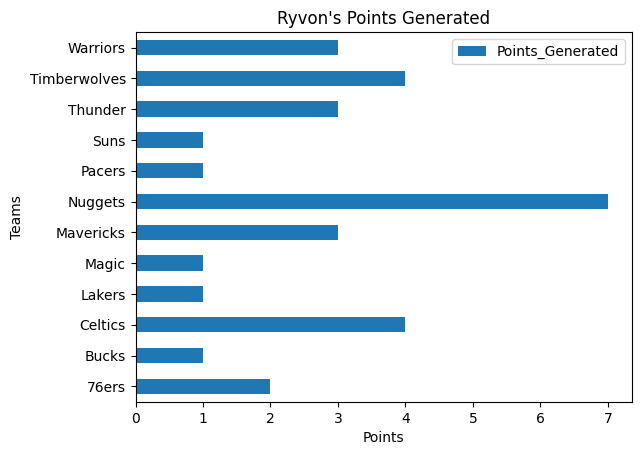

In [ ]:
# Bar Chart of Ry's Teams and the points genertated - shows how the other teams stacked up in generating points for Ry

df_rymp_pve.plot(x="Ryvon's Prediction", y="Points_Generated", kind="barh", title="Ryvon's Points Generated", xlabel="Points", ylabel="Teams")

I will repeat the same steps condensed for Hans and Haks Most profitable team

In [ ]:
# Hansel's Most Profitable

df_hansmp = df.value_counts(subset = ["Hansel's Prediction","Hansel's Points"])

df_hansmp = df_hansmp.reset_index()

df_hansmp["Hansel's Points"] = pd.to_numeric(df_hansmp["Hansel's Points"],downcast="integer")

# Generate the number of points by multiplying points by the count

df_hansmp["Points_Generated"] = df_hansmp["Hansel's Points"] * df_hansmp["count"]

df_hansmp_pve = df_hansmp[df_hansmp["Hansel's Points"] >= 1].reset_index(drop=True)

df_hansmp_pve = df_hansmp_pve.groupby(by=["Hansel's Prediction"]).sum().reset_index()

hans_max_loc = df_hansmp_pve["Points_Generated"].idxmax(axis=0)

hans_mostprofitable = df_hansmp_pve.iloc[hans_max_loc,0] # 0 to access team name

hans_maxteam_points = df_hansmp_pve.iloc[hans_max_loc,3] # 3 to acces point total

print("Hansel's Most Profitable team is: ", hans_mostprofitable, "(",hans_maxteam_points,"points )")

Hansel's Most Profitable team is:  Nuggets ( 10 points )


<Axes: title={'center': "Hansel's Points Generated"}, xlabel='Points', ylabel='Teams'>

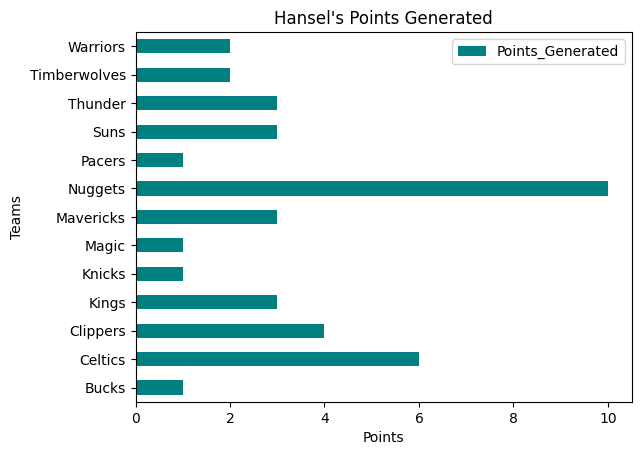

In [ ]:
df_hansmp_pve.plot(x="Hansel's Prediction", y="Points_Generated", kind="barh", title="Hansel's Points Generated", color="teal", ylabel="Teams", xlabel="Points")

In [ ]:
# Hakeem's Most Profitable

df_haksmp = df.value_counts(subset = ["Hakeem's Predictions","Hakeem's Points"])

df_haksmp = df_haksmp.reset_index()

df_haksmp["Hakeem's Points"] = pd.to_numeric(df_haksmp["Hakeem's Points"],downcast="integer")

# Generate the number of points by multiplying points by the count

df_haksmp["Points_Generated"] = df_haksmp["Hakeem's Points"] * df_haksmp["count"]

df_haksmp_pve = df_haksmp[df_haksmp["Hakeem's Points"] >= 1].reset_index(drop=True)

df_haksmp_pve = df_haksmp_pve.groupby(by=["Hakeem's Predictions"]).sum().reset_index()

haks_max_loc = df_haksmp_pve["Points_Generated"].idxmax(axis=0)

haks_mostprofitable = df_haksmp_pve.iloc[haks_max_loc,0] # 0 to access team name

haks_maxteam_points = df_haksmp_pve.iloc[haks_max_loc,3] # 3 to acces point total

print("Hakeem's Most Profitable team is: ", haks_mostprofitable, "(", haks_maxteam_points,"points )")

Hakeem's Most Profitable team is:  Nuggets ( 7 points )


<Axes: title={'center': "Hakeem's Points Generated"}, xlabel='Points', ylabel='Teams'>

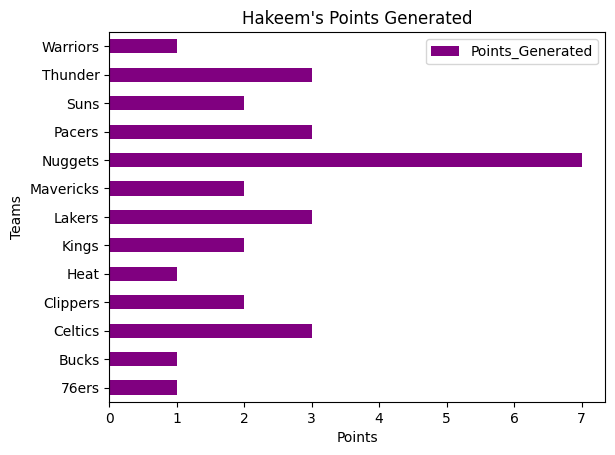

In [ ]:
df_haksmp_pve.plot(x="Hakeem's Predictions", y="Points_Generated", kind="barh", title="Hakeem's Points Generated", color="purple", ylabel="Teams", xlabel="Points")

### Perfect And Wretched Weeks

Determining which predictor had the most weeks where they got maximum possible points and the most weeks where the got the least possible points


In [ ]:
# Data type of the points need to be changed to int

df[["Ryvon's Points", "Hansel's Points", "Hakeem's Points" ]] = df[["Ryvon's Points", "Hansel's Points", "Hakeem's Points" ]].astype("int")

In [ ]:
# df[["NBA Week","Ryvon's Points", "Hansel's Points", "Hakeem's Points"]].groupby(by="NBA Week").sum().reset_index()

In [ ]:
df_temp = df

In [ ]:
df_temp["Max_Prediction_Points"] = 1

# Week 25 has an exception as max points were diferent per prediction - Different weights were given to each prediction

df_temp.loc[df["NBA Week"] == "Week 25", "Max_Prediction_Points"] = [2,3,1]

# Conditional statement for data frame that where NBA week is Week 25 replace the data for prediction_Counter to the list of numbers

In [ ]:
# Check to ensure the number changed

df_temp[["NBA Week","Max_Prediction_Points"]].where(df["NBA Week"] == "Week 25")

,NBA Week,Max_Prediction_Points
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
...,...,...
60,NaN,NaN
61,NaN,NaN
62,Week 25,2.0
63,Week 25,3.0


In [ ]:
df_weeks_breakdown = df_temp[["NBA Week","Ryvon's Points", "Hansel's Points", "Hakeem's Points","Max_Prediction_Points"]].groupby(by="NBA Week").sum().reset_index()

In [ ]:
# Change data type from object to string so it can be sorted

df_weeks_breakdown["NBA Week"]= df_weeks_breakdown["NBA Week"].astype("string")

df_weeks_breakdown["NBA Week"] = df_weeks_breakdown["NBA Week"].str.split(pat="Week ", expand=True)[1]

In [ ]:
# Change data type from string to integer
list_weeks = pd.to_numeric(df_weeks_breakdown["NBA Week"], downcast="integer")

In [ ]:
df_weeks_breakdown["NBA Week"] = list_weeks

In [ ]:
df_weeks_breakdown.sort_values(by="NBA Week").reset_index(drop=True)

,NBA Week,Ryvon's Points,Hansel's Points,Hakeem's Points,Max_Prediction_Points
0,1,0,2,1,2
1,2,1,2,1,3
2,3,3,2,1,3
3,4,1,1,1,3
4,5,2,1,2,3
5,6,2,2,1,3
6,8,2,3,2,3
7,9,1,2,2,3
8,10,2,2,3,5
9,12,2,2,1,3


In [ ]:
# Create new column to track perfect weeks
df_weeks_breakdown["Ry's Perfect Week"] = None
df_weeks_breakdown["Ry's Wretched Week"] = None

# If Points and Max Points equal the same then perfect week is true
df_weeks_breakdown.loc[df_weeks_breakdown["Ryvon's Points"] == df_weeks_breakdown["Max_Prediction_Points"], "Ry's Perfect Week"] = True

# If Points and Max Points equal are not the same then perfect week is false
df_weeks_breakdown.loc[df_weeks_breakdown["Ryvon's Points"] != df_weeks_breakdown["Max_Prediction_Points"], "Ry's Perfect Week"] = False

# If points accummalated in a week is 0 or less
df_weeks_breakdown.loc[df_weeks_breakdown["Ryvon's Points"] <= 0, "Ry's Wretched Week"] = True

# If points accummalated in a week is greater that 0
df_weeks_breakdown.loc[df_weeks_breakdown["Ryvon's Points"] > 0, "Ry's Wretched Week"] = False


In [ ]:
df_weeks_breakdown["Ry's Perfect Week"].value_counts()

Ry's Perfect Week
False    19
True      2
Name: count, dtype: int64

In [ ]:
# D0 the Smae for Hans and Haks Prediction weeks

df_weeks_breakdown["Hans's Perfect Week"] = None

df_weeks_breakdown["Haks's Perfect Week"] = None

df_weeks_breakdown.loc[df_weeks_breakdown["Hansel's Points"] == df_weeks_breakdown["Max_Prediction_Points"], "Hans's Perfect Week"] = True
df_weeks_breakdown.loc[df_weeks_breakdown["Hansel's Points"] != df_weeks_breakdown["Max_Prediction_Points"], "Hans's Perfect Week"] = False

df_weeks_breakdown.loc[df_weeks_breakdown["Hakeem's Points"] == df_weeks_breakdown["Max_Prediction_Points"], "Haks's Perfect Week"] = True
df_weeks_breakdown.loc[df_weeks_breakdown["Hakeem's Points"] != df_weeks_breakdown["Max_Prediction_Points"], "Haks's Perfect Week"] = False


In [ ]:
df_weeks_breakdown["Hans's Perfect Week"].value_counts()

Hans's Perfect Week
False    16
True      5
Name: count, dtype: int64

In [ ]:
df_weeks_breakdown["Haks's Perfect Week"].value_counts()

Haks's Perfect Week
False    19
True      2
Name: count, dtype: int64

In [ ]:
# Create new column to track wretched weeks

df_weeks_breakdown["Ry's Wretched Week"] = None

# If points accummalated in a week is 0 or less
df_weeks_breakdown.loc[df_weeks_breakdown["Ryvon's Points"] <= 0, "Ry's Wretched Week"] = True

# If points accummalated in a week is greater that 0
df_weeks_breakdown.loc[df_weeks_breakdown["Ryvon's Points"] > 0, "Ry's Wretched Week"] = False


df_weeks_breakdown["Hans's Wretched Week"] = None
df_weeks_breakdown["Haks's Wretched Week"] = None

df_weeks_breakdown.loc[df_weeks_breakdown["Hansel's Points"] <= 0, "Hans's Wretched Week"] = True
df_weeks_breakdown.loc[df_weeks_breakdown["Hansel's Points"] > 0, "Hans's Wretched Week"] = False

df_weeks_breakdown.loc[df_weeks_breakdown["Hakeem's Points"] <= 0, "Haks's Wretched Week"] = True
df_weeks_breakdown.loc[df_weeks_breakdown["Hakeem's Points"] > 0, "Haks's Wretched Week"] = False

In [ ]:
df_weeks_breakdown["Ry's Wretched Week"].value_counts()

Ry's Wretched Week
False    18
True      3
Name: count, dtype: int64

In [ ]:
df_weeks_breakdown["Haks's Wretched Week"].value_counts()

Haks's Wretched Week
False    18
True      3
Name: count, dtype: int64

In [ ]:
df_weeks_breakdown["Hans's Wretched Week"].value_counts()

Hans's Wretched Week
False    20
True      1
Name: count, dtype: int64

### Hot and Cold Streaks

Most consecutive wins and losses



In [ ]:
def streak_counter(df, name):

  # A streak being defined by having 2 or more consecutive correct or incorrect predictions

  hot_streak_counter = 0
  cold_streak_counter = 0
  heat_list = list()
  cold_list = list()
  streak_list = list()

  for index, row in df.iterrows():
    if row[name+"'s Points"] > 0:
      # Cold streak ends on a correct predction
      if cold_streak_counter > 1: cold_list.append(cold_streak_counter) # add cold_streak' s value to list

      cold_streak_counter = 0 # Reset cold streak counter
      hot_streak_counter += 1
    else:
      # Hot streak ends on a incorrect predction
      if hot_streak_counter > 1: heat_list.append(hot_streak_counter) # add hot_streak' s value to list

      hot_streak_counter = 0 # Reset hot streak counter
      cold_streak_counter += 1

  streak_list = { 'longest_hot_streak': max(heat_list), # longest hot streak
                  'longest_cold_streak': max(cold_list), #longest cold streak
                  'num_hot_streaks': len(heat_list), # number of hot streaks
                  'num_cold_streaks': len(cold_list) # number of cold streaks
                  }

  return streak_list # return dict of hot and cold streak values


In [ ]:
ry_streak = streak_counter(df,"Ryvon")
ry_streak

{'longest_hot_streak': 6,
 'longest_cold_streak': 6,
 'num_hot_streaks': 6,
 'num_cold_streaks': 10}

In [ ]:
hans_streak = streak_counter(df,"Hansel")
hans_streak

{'longest_hot_streak': 5,
 'longest_cold_streak': 6,
 'num_hot_streaks': 9,
 'num_cold_streaks': 5}

In [ ]:
haks_streak = streak_counter(df,"Hakeem")
haks_streak

{'longest_hot_streak': 5,
 'longest_cold_streak': 6,
 'num_hot_streaks': 6,
 'num_cold_streaks': 8}